In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import *
from IPython.display import display, HTML

%matplotlib inline

                                              ..-
    PyKat 1.1.297         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
kat1 = finesse.kat()
kat1.verbose = False

In [3]:
code = """
# Ex2c.kat 
# Simple cavity, PDH signal in reflection.
# Observe transfer function from 
# ETM displacement signal to PDH signal.
# Lock ITM tuning or laser frequency with PDH error signal
#
# P. Fulda 2013.06.17
######################################################


# interferometer parts
l laser 1 0 nlaser
s laser2EOM 1 nlaser nEOMin
mod EOM 9M 0.1 1 pm nEOMin nEOMtrans
s EOM2BS 1 nEOMtrans nBSin
bs BSpickoff 0.5 0.5 0 45 nBSin dump nBStrans nBSreturn
s BS2ITM 1 nBStrans nITMin
m ITM 0.99 0.01 0 nITMin nITMtrans
s cavityspace 1 nITMtrans nETMin
m ETM 0.99 0.01 0 nETMin nETMtrans
s BS2PDHPD 1 nBSreturn nPDHPD


# Take transfer function from ETM displacement or laser freq. to
# PDH signal 
#/*
# detectors
pd2 PDHPD 9M 20 10 nPDHPD
fsig mysignal ETM 10 0
#fsig mysignal laser 10 0
xaxis mysignal f log 0.1 10M 1000
put PDHPD f2 $x1
yaxis log abs:deg
scale meter
#*/

/*
# Engage feedback of PDH error signal to ITM and scan ETM tuning
# or laser frequency
pd1 PDHPD 9M 0 nPDHPD
pd DCPD nETMtrans
set PDHerrorsig PDHPD re
lock mylock $PDHerrorsig -10 1p
put* ITM phi $mylock
noplot mylock
noplot PDHPD

xaxis ETM phi lin 0.1 90 500
*/ 

/*
# Engage feedback of PDH error signal to laser freq. and scan ETM tuning
pd1 PDHPD 9M 0 nPDHPD
pd DCPD nETMtrans
set PDHerrorsig PDHPD re
lock mylock $PDHerrorsig -10M 1p
put laser f $mylock
noplot mylock
noplot PDHPD

xaxis ETM phi lin 0.1 45 500
*/"""

In [4]:
kat1.parse(code)
out = kat1.run()

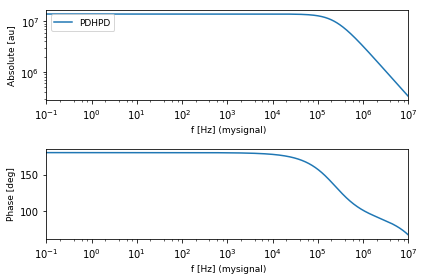

In [5]:
fig = out.plot()


In [6]:
kat2 = deepcopy(kat1)
kat2.verbose = False